In [73]:

import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from pylab import rcParams
import scipy as sp
import seaborn as sns
import xgboost as xgb

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator , TransformerMixin

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML




### Here are the main steps you will go through:
    Look at the big picture. 
    Get the data. 
    Discover and visualize the data to gain insights. 
    Prepare the data for Machine Learning algorithms. 
    Select a model and train it. 
    Fine-tune your model. 
    Present your solution. 
    Launch, monitor, and maintain your system.

### Project overview
    Welcome to Machine Learning Housing Corporation! The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short. Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

### Frame the Problem

    The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. How does the company expect to use and benefit from this model? This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.
    
    Your boss answers that your model’s output (a prediction of a district’s median housing price) will be fed to another Machine Learning system, along with many other signals . This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.
    
    The next question to ask is what the current solution looks like (if any). It will often give you a reference performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.
    
    This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district. The census data looks like a great dataset to exploit for this purpose, since it includes the median housing prices of thousands of districts, as well as other data.
    
    Okay, with all this information you are now ready to start designing your system. First, you need to frame the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques?

### Select a Performance Measure
    A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.
    
    Suppose that there are many outlier districts. In that case, you may consider using the Mean Absolute Error

### Check the Assumptions
    Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on. For example, the district prices that your system outputs are going to be fed into a downstream Machine Learning system, and we assume that these prices are going to be used as such. 
    
    But what if the downstream system actually converts the prices into categories “cheap,” “medium,” or “expensive”) and then uses those categories instead of the prices themselves? In this case, getting the price perfectly right is not important at all; your system just needs to get the category right. If that’s so, then the problem should have been framed as a classification task, not a regression task. You don’t want to find this out after working on a regression system for months.

In [2]:
### Get the data

#Here is the function to fetch the data
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [3]:
# inspect the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005C382FB828>,
      dtype=object)

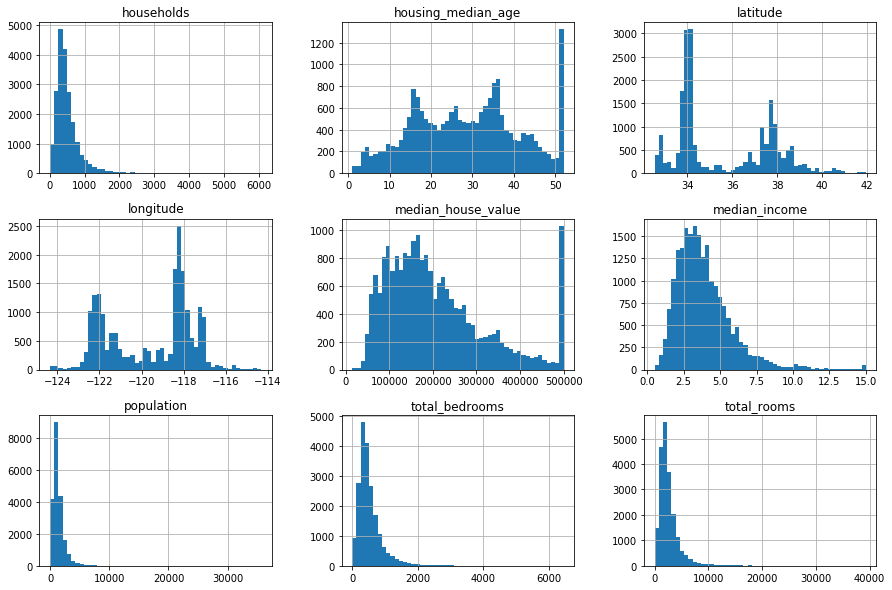

In [7]:
housing.hist(bins=50,figsize=(15,10))

In [8]:
### Create a test set
    #you can use from sklearn.model_selection "train_test_split" for random sampling if you have a large dataset
    # but you run the risk of introducing a significant sampling bias.
    # We will assume that we are told that median income is a very important attribute, thus we will make new feature
    # called income_category to help split and shuffle the data to make sure we have adequate sampling for the different
    #income categories
    
housing["income_category"]=np.ceil(housing["median_income"]/1.5)
housing["income_category"].where(housing["income_category"] < 5,5.0,inplace=True)

In [9]:
#split the training and testing data based up income category
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
# check the results
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
income_category       float64
dtype: object

In [11]:
#Lets look at the proportion of data allocated to each income category
strat_test_set.income_category.value_counts()/len(strat_test_set)*100

3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_category, dtype: float64

In [12]:
#Compare the proportion of data allocated to the original housing data
housing.income_category.value_counts()/len(housing)*100

3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: income_category, dtype: float64

In [13]:
rand_train_set, rand_test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)

In [14]:
#Compare the proportion of data allocated to the housing data set using just random sammpling
rand_test_set.income_category.value_counts()/len(rand_test_set)*100

3.0    35.852713
2.0    32.437016
4.0    16.739341
5.0    10.949612
1.0     4.021318
Name: income_category, dtype: float64

In [15]:
# drop the income category columns to get the data back to its original state

for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_category', axis=1, inplace =True)


### Visualize the Data to gain insight

In [16]:
# Let’s create a copy so you can play with it without harming the training set:

housing=strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


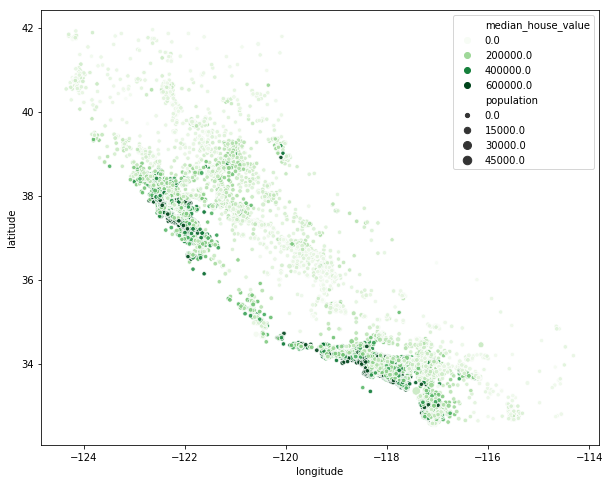

In [17]:
### Visualize the graphical data
plt.figure(figsize=(10,8))
sns.scatterplot(data=housing, x='longitude',y='latitude',hue='median_house_value',size="population",alpha = 0.9,palette="Greens")

In [18]:
# compute correlations
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [19]:
#create a table of correlations between features and median house value
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

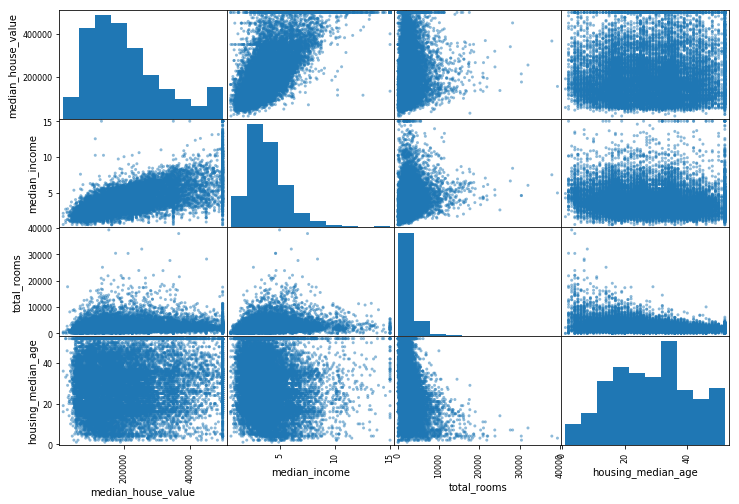

In [20]:
attributes = [ "median_house_value" , "median_income" , "total_rooms" , "housing_median_age" ] 
scatter_matrix( housing [ attributes ], figsize = ( 12 , 8 ))
plt.show()

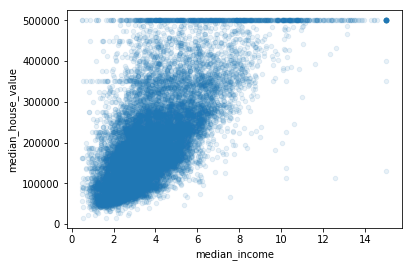

In [21]:
#lets zoom in on the relationship between median house value and median income

housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

#from inspecting the data we see that there are clear cut offs which will produce an issue later.
#You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

### Experimenting with Attribute Combinations

One last thing you may want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes:

In [22]:
housing['rms_per_household']=housing.total_rooms/housing.households
housing['bedrms_per_room']=housing.total_bedrooms/housing.total_rooms
housing['pop_per_household']=housing.population/housing.households

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rms_per_household,bedrms_per_room,pop_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [23]:
#create a table of correlations between features and median house value
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
rms_per_household     0.146285
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
pop_per_household    -0.021985
population           -0.026920
longitude            -0.047432
latitude             -0.142724
bedrms_per_room      -0.259984
Name: median_house_value, dtype: float64

In [24]:
# view missing features
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
rms_per_household       0
bedrms_per_room       158
pop_per_household       0
dtype: int64

In [31]:
#separate the predictor variables from the target variables

housing= strat_train_set.drop(columns=['median_house_value'])
housing_labels=strat_train_set.median_house_value.copy()

In [26]:
#revert the data to its original form
housing.drop(columns=['rms_per_household','bedrms_per_room','pop_per_household'],inplace=True)

In [32]:
# Impute the missing data using SimpleImputer
imputer= SimpleImputer(strategy="median")

#Since the median can only be computed on numerical attributes, 
#we need to create a copy of the data without the text attribute ocean_proximity

housing_num=housing.drop(columns=['ocean_proximity'])

imputer.fit(housing_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [29]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0


### Handling Categorical Data

In [45]:
from numpy import array
from numpy import reshape
housing_cat=array(housing.ocean_proximity)
housing_cat=housing_cat.reshape(-1, 1)

In [46]:
#Most Machine Learning algorithms prefer to work with numbers anyway, 
#so let’s convert these categories from text to numbers.

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
#Get a list of the categories from the encoder
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [70]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]


In [71]:
#Run the custom transformer
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True) 
housing_extra_attribs = attr_adder.transform(housing.values)

In [74]:
pd.DataFrame(housing_extra_attribs).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341


In [76]:
# Now use the pipline constructor
num_pipline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                      ('attributes_adder',CombinedAttributesAdder()),
                      ('std_scalar',StandardScaler())])
housing_num_trans=num_pipline.fit_transform(housing_num)
pd.DataFrame(housing_num_trans).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928
